<h2> Задача численного дифференцирования

Формула первого порядка аппроксимации:

$f'(x) = \frac{f(x+h)-f(x)}{h}$

In [1]:
import numpy as np
from pylab import *


N = 100000
M2 = 1.
E = 1e-10 #2.2204460492503131e-16

h = np.linspace(0.000001,0.0005,N)
y_diff = np.zeros(len(h))

for i in range(len(h)):
    y_diff[i] = M2*h[i]/2. + 2.*E/h[i]

figure()
title("Зависимость суммарной погрешности от шага") # заголовок
xlabel("h") # ось абсцисс
ylabel("$|r|$") # ось ординат
grid()      # включение отображение сетки
plot(h,y_diff,'-')
show() 

<Figure size 640x480 with 1 Axes>

Формула второго порядка аппроксимации:

$f'(x) = \frac{f(x+h)-f(x-h)}{2h}$

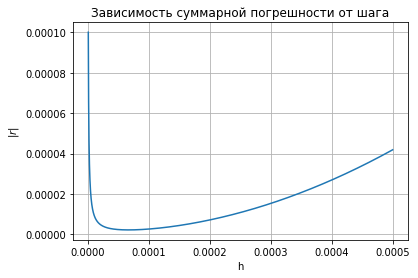

In [2]:
import numpy as np
from pylab import *


N = 100000
M3 = 1000.
E = 1e-10 #2.2204460492503131e-16

h = np.linspace(0.000001,0.0005,N)
y_diff = np.zeros(len(h))

for i in range(len(h)):
    y_diff[i] = M3*h[i]**2/6. + E/h[i]

figure()
title("Зависимость суммарной погрешности от шага") # заголовок
xlabel("h") # ось абсцисс
ylabel("$|r|$") # ось ординат
grid()      # включение отображение сетки
plot(h,y_diff,'-')
show() 

Формула четвертого порядка аппроксимации:

$f'(x) = \frac{f(x-2h)+8f(x-h)-8f(x+h)-f(x+2h)}{12h}$

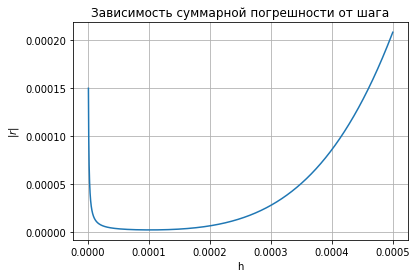

In [3]:
import numpy as np
from pylab import *


N = 100000
M5 = 100000000000.
E = 1e-10 #2.2204460492503131e-16

h = np.linspace(0.000001,0.0005,N)
y_diff = np.zeros(len(h))

for i in range(len(h)):
    y_diff[i] = M5*h[i]**4/30. + 3*E/(2*h[i])

figure()
title("Зависимость суммарной погрешности от шага") # заголовок
xlabel("h") # ось абсцисс
ylabel("$|r|$") # ось ординат
grid()      # включение отображение сетки
plot(h,y_diff,'-')
show() 

<h2> Задание 1

1.1 Определите оптимальный шаг дифференцирования (по формулам 1-го, 2-го и 4-го порядков аппроксимации) для функции $f(x) = -x^{2}cos^{2}(x)$ на отрезке [0,1].

1.2 Воспользуйтесь методом неопределённых коэффициентов для нахождения производной функции $f(x)=xcos(x) + 2x$ по точкам на отрезке [0,1]. Можно воспользоваться готовой формулой для вычисления производной по заданным точкам. Сравните найденные значения с точным значением производной функции. Постройте график зависимости нормы погрешности от значения аргумента.

1.3 Воспользуйтесь методом неопределённых коэффициентов для нахождения производной функции $f(x)=x^{2}cos(x) + 2x$ по точкам x,x+h,x-h,x+2h,x-2h. 
Сравните с точным значением производной функции. Постройте график зависимости нормы погрешности от значения аргумента.

1.4 Сравните значения функции найденное по формулам численного дифференцирования в п. 1.2 и 1.3 с точным значением производной.

1.5 Используя формулы численного дифференцирования найдите производную $x^2 \log(x+1)$ в $x=0$. Сравните с результатом полученным аналитически. Постройте графики зависимости производной от аргумента (посчитанной приближенно и аналитически) и погрешность нахождения производной как нормы разности между точным значением  приближенным. 

In [4]:
def func(x):
    return - x * x * np.cos(x) * np.cos(x)

**1.1 Определите оптимальный шаг дифференцирования**

Функции, выдающие 2, 4, 5 производные исходной функции.

In [7]:
def deriv_2(x):
    res = 2 * x * x * np.sin(x) * np.sin(x) - 2 * (x*x - 1) * (np.cos(x))**2 - 8 * x * np.sin(x)*cos(x)
    return res

def deriv_3(x):
    res = -4 * ((3 - 2 * x * x) * np.sin(x) * np.cos(x) - 3* x* np.sin(x) * np.sin(x)  + 3* x * np.cos(x) * np.cos(x))
    return res

def deriv_5(x):
    res = 16 *(-2 *(x * x - 5) *np.sin(x)* np.cos(x) - 5*x* np.sin(x) * np.sin(x) + 5* x* np.cos(x)*np.cos(x))
    return res

In [11]:
# Можно переопределить М2, М3, М5
grid = np.linspace(0, 1, 10000)

M2 = np.max(abs(deriv_2(grid)))
print('M2 = ', M2)
M3 = np.max(abs(deriv_3(grid)))
print('M3 = ', M3)
M5 = np.max(abs(deriv_5(grid)))
print('M5 = ', M5)

M2 =  2.3658381333077605
M3 =  7.463749324399393
M5 =  87.01862573547618


In [12]:
h_opt_1 = 2 * np.sqrt(E/M2)
print("Оптимальный шаг, аппроксимация 1-го порядка", h_opt_1)
h_opt_2 = (3 * E / M3) ** (1/3)
print("Оптимальный шаг, аппроксимация 2-го порядка", h_opt_2)
h_opt_4 = (45 * E / 4 / M5) ** (1/5)
print("Оптимальный шаг, аппроксимация 4-го порядка", h_opt_4)

Оптимальный шаг, аппроксимация 1-го порядка 1.3002817942384893e-05
Оптимальный шаг, аппроксимация 2-го порядка 0.00034254797404109096
Оптимальный шаг, аппроксимация 4-го порядка 0.006642140538493509


**1.2 Воспользуйтесь методом неопределённых коэффициентов для нахождения производной функции** $f(x)=xcos(x) + 2x$ **по точкам на отрезке [0,1]. Можно воспользоваться готовой формулой для вычисления производной по заданным точкам. Сравните найденные значения с точным значением производной функции. Постройте график зависимости нормы погрешности от значения аргумента.**

In [18]:
def func_2(x):
    res = x * np.cos(x) + 2 * x
    return res

В методе неопределенных коэффициентов мы берем n точек и по значениям функции в них определяем значение производной в нужной точке. Поскольку n выше не оговорено, возьмем его произвольно, например n = 3.

Точки: x, x-h, x+2h.

Согласно вычислениям на семинаре + лекционным материалам, находим коэффициенты a, b, c, с которыми значения функции входят в формулу:

$f'(x) = \dfrac{1}{h} (af_{i-1} + bf_{i} +cf_{i+1})$

In [41]:
# составим матрицу системы
A = np.array([[1, 1, 1],
            [-1, 0, 2],
            [1/2, 0, 2]])

b = np.array([0, 1, 0])

a, b, c = np.linalg.solve(A, b)
print('a = ', a)
print('b = ', b)
print('c = ', c)

a =  -0.6666666666666666
b =  0.5
c =  0.16666666666666666


In [43]:
# take h = 0.001
h = 1e-3

def prac_der_2(x):
    res = (a * func_2(x-h) + b * func_2(x) + c * func_2(x+2*h)) / h
    return res

In [44]:
# точное значение производной
def real_der_2(x):
    res =  -x * np.sin(x) + np.cos(x) + 2
    return res

Сравним найденное приближенное и точное значение производной исходной функции:

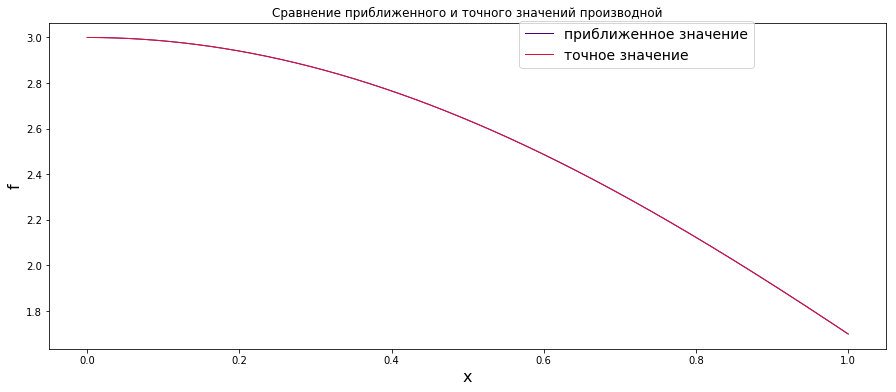

In [45]:
grid = np.linspace(0, 1, 1000)
plt.figure(figsize=(15, 6))
plt.plot(grid, prac_der_2(grid), color = 'indigo', label = "приближенное значение", linewidth = 1)
plt.plot(grid, real_der_2(grid), color = 'crimson', label = "точное значение", linewidth = 1)
plt.xlabel('x', fontsize=16)
plt.ylabel('f', fontsize=16)
plt.legend(fontsize = 14, bbox_to_anchor=(0.85,1.025))
plt.title("Сравнение приближенного и точного значений производной")
plt.show()

Приближение очень хорошее, однако для более ясного понимания рассмотрим график погрешности:

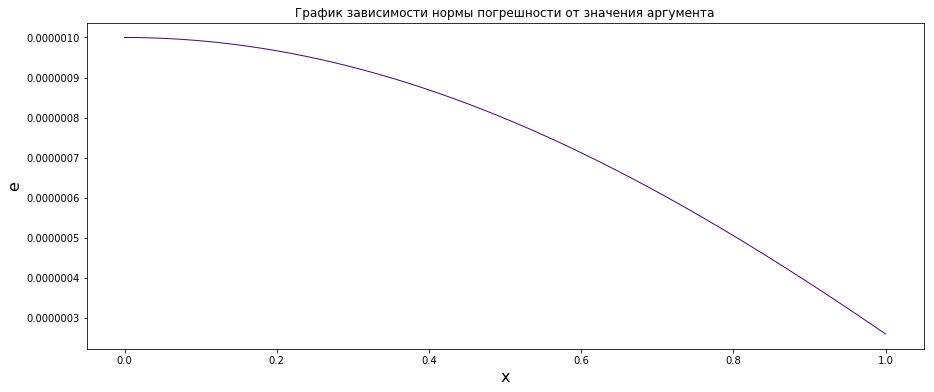

In [46]:
grid = np.linspace(0, 1, 1000)
plt.figure(figsize=(15, 6))
plt.plot(grid, abs(prac_der_2(grid) -real_der_2(grid)) , color = 'indigo', linewidth = 1)
plt.xlabel('x', fontsize=16)
plt.ylabel('e', fontsize=16)
plt.title("График зависимости нормы погрешности от значения аргумента")
plt.show()

Как мы видим, погрешность меняется, становясь меньше, но опять же в очень маленьком интервале. И в целом, погрешность довольно хорошая. 

**1.3** Воспользуйтесь методом неопределённых коэффициентов для нахождения производной функции $f(x)=x^{2}cos(x) + 2x$ по точкам x,x+h,x-h,x+2h,x-2h. 
Сравните с точным значением производной функции. Постройте график зависимости нормы погрешности от значения аргумента.


In [19]:
def func_3(x):
    res = x * x * np.cos(x) + 2 * x
    return res

У нас будет представление в виде $f'(x) = \frac{1}{h}(a f_{i-2} + bf_{i-1} + c f_i + d f_{i+1} + e f_{i+2}) $

Можем написать систему для нахождения a, b, c, d, e: так же как на семинаре + пример системы в общем виде с лекции был.

In [47]:
A = np.array([[1, 1, 1, 1, 1],
             [-2, -1, 0, 1, 2],
             [2, 0.5, 0, 0.5, 2],
             [-8/6, -1/6, 0, 1/6, 8/6],
             [16/24, 1/24, 0, 1/24, 16/24]])

b = np.array([0, 1, 0, 0, 0])
aa, bb, cc, dd, ee = np.linalg.solve(A, b)
print('a = ', aa)
print('b = ', bb)
print('c = ', cc)
print('d = ', dd)
print('e = ', ee)

a =  0.08333333333333343
b =  -0.6666666666666667
c =  0.0
d =  0.6666666666666666
e =  -0.08333333333333331


In [51]:
# take h = 0.001
h = 1e-3

def prac_der_3(x):
    res = (aa * func_3(x-2*h) + bb * func_3(x-h) + cc * func_3(x) + dd * func_3(x+h) + ee * func_3(x+2*h)) / h
    return res

Точное значение производной: $x^2 \cdot (-sin(x)) + 2 x cos(x) + 2$


In [52]:
def real_der_3(x):
    res = x* x * (-np.sin(x)) + 2* x* np.cos(x) + 2
    return res

Сравним приближенное и точное значения:

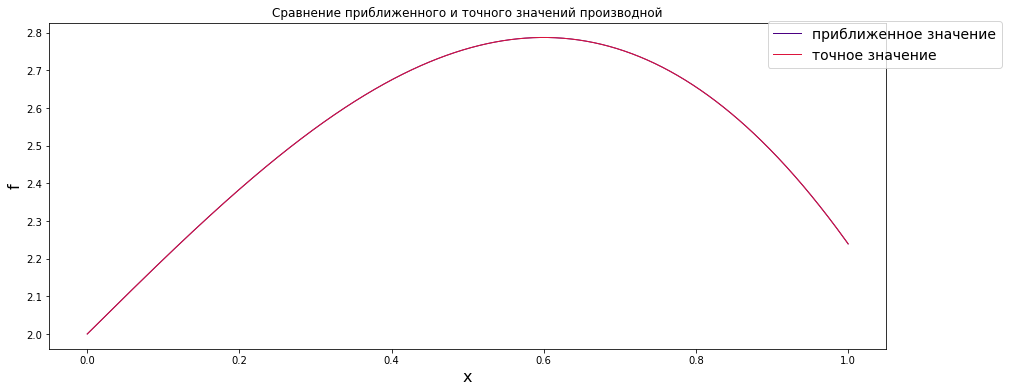

In [53]:
grid = np.linspace(0, 1, 1000)
plt.figure(figsize=(15, 6))
plt.plot(grid, prac_der_3(grid), color = 'indigo', label = "приближенное значение", linewidth = 1)
plt.plot(grid, real_der_3(grid), color = 'crimson', label = "точное значение", linewidth = 1)
plt.xlabel('x', fontsize=16)
plt.ylabel('f', fontsize=16)
plt.legend(fontsize = 14, bbox_to_anchor=(0.85,1.025))
plt.title("Сравнение приближенного и точного значений производной")
plt.show()

Как мы видим по рисунку, значения функций (точной и приближенной) практически совпадают, то есть приближение очень хорошее.

Рассмотрим график погрешности:

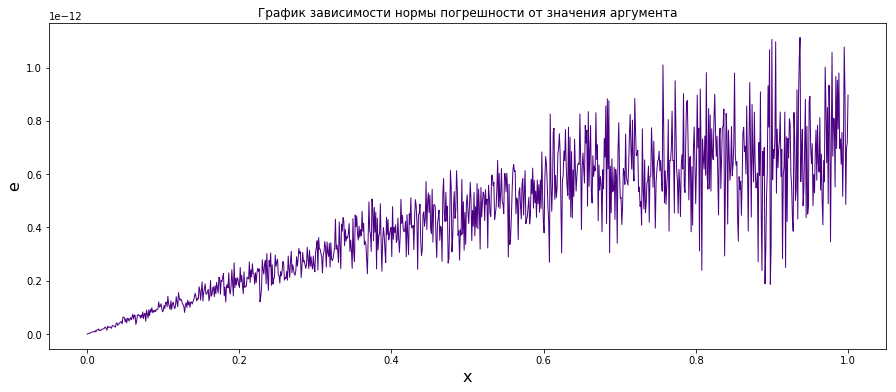

In [54]:
grid = np.linspace(0, 1, 1000)
plt.figure(figsize=(15, 6))
plt.plot(grid, abs(prac_der_3(grid) -real_der_3(grid)) , color = 'indigo', linewidth = 1)
plt.xlabel('x', fontsize=16)
plt.ylabel('e', fontsize=16)
plt.title("График зависимости нормы погрешности от значения аргумента")
plt.show()

Как мы видим, погрешность колеблется от аргумента к агрументу, но в очень маленьких пределах (на шкале ординат коэффициент 1е-12).

**1.4** Сравните значения функции найденное по формулам численного дифференцирования в п. 1.2 и 1.3 с точным значением производной.

Графики сравнения приближенного и точного значений приведены выше в обоих пунктах. 

В обоих случаях приближение довольно хорошее, что видно из графиков.

**1.5** Используя формулы численного дифференцирования найдите производную $x^2 \log(x+1)$ в $x=0$. Сравните с результатом полученным аналитически. Постройте графики зависимости производной от аргумента (посчитанной приближенно и аналитически) и погрешность нахождения производной как нормы разности между точным значением  приближенным. 

Аналитически: производная равна $2x \cdot log(x+1) + \dfrac{x^2}{x+1}$.

В нуле это будет:

$0 + 0 = 0$

Я буду пользоваться снова методом неопределенных коэффициентов, причем узлы возьму такие же, как в номере 1.3: x-2h, x-h, x, x+h, x+2h

In [56]:
def func_5(x):
    res = x * x * np.log(x+1)
    return res

In [57]:
# take h = 0.001
h = 1e-3

def prac_der_5(x):
    res = (aa * func_5(x-2*h) + bb * func_5(x-h) + cc * func_5(x) + dd * func_5(x+h) + ee * func_5(x+2*h)) / h
    return res

In [58]:
def real_der_5(x):
    res = 2 * x * np.log(x + 1) + x * x / (x+1)
    return res

Сравним приближенное и точное значения:

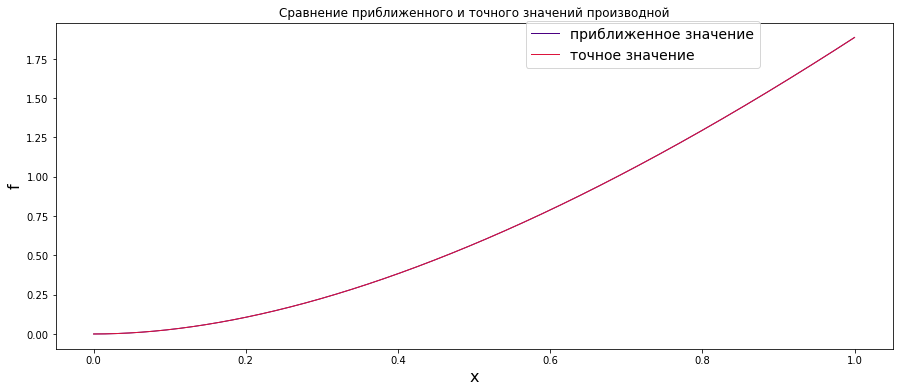

In [59]:
grid = np.linspace(0, 1, 1000)
plt.figure(figsize=(15, 6))
plt.plot(grid, prac_der_5(grid), color = 'indigo', label = "приближенное значение", linewidth = 1)
plt.plot(grid, real_der_5(grid), color = 'crimson', label = "точное значение", linewidth = 1)
plt.xlabel('x', fontsize=16)
plt.ylabel('f', fontsize=16)
plt.legend(fontsize = 14, bbox_to_anchor=(0.85,1.025))
plt.title("Сравнение приближенного и точного значений производной")
plt.show()

И снова, приближение очень хорошее, графики практически неразличимы.

Поэтому взглянем на график погрешности:

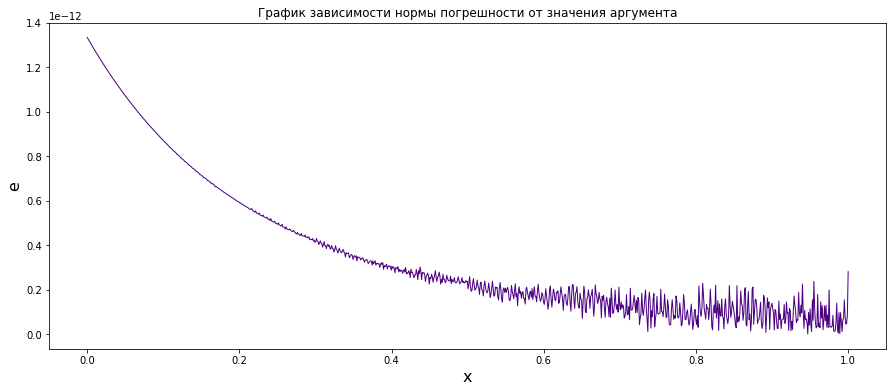

In [61]:
grid = np.linspace(0, 1, 1000)
plt.figure(figsize=(15, 6))
plt.plot(grid, abs(prac_der_5(grid) -real_der_5(grid)) , color = 'indigo', linewidth = 1)
plt.xlabel('x', fontsize=16)
plt.ylabel('e', fontsize=16)
plt.title("График зависимости нормы погрешности от значения аргумента")
plt.show()

И снова, погрешность очень маленькая.

In [62]:
print('максимальная погрешность: ', np.max(abs(prac_der_5(grid) -real_der_5(grid))))

максимальная погрешность:  1.3333374081743323e-12


<h2> Задание 2

2.1 Постройте minimax полином степени 1, 2 и 3 для функции $f(x) = e^{x}$ на отрезке [0; 1].

2.2 Оцените погрешность приближения. Постройте на одном графике все три полинома.

**2.1** Постройте minimax полином степени 1, 2 и 3 для функции  𝑓(𝑥)=𝑒𝑥  на отрезке [0; 1].

**Степень 1**

In [76]:
def make_poly(n, x):
    return x ** n

In [116]:
def expon(x):
    return np.exp(x)

In [126]:
x21 = np.random.uniform(0, 1, 10000)
f21 = np.exp(x21) - 1 

In [127]:
from sklearn.linear_model import LinearRegression

my_regression = LinearRegression()
my_regression.fit((np.array([make_poly(i, x21) for i in range (0,2)])).T, f21)
#my_regression.fit((np.array(x21)).reshape(-1, 1), f21)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [128]:
coef_1 = my_regression.coef_
print(coef_1)

[0.         1.68610714]


In [129]:
# итоговое приближение, тут прибавляю единицу к свободному члену, так как до этого ее вычитала в f21
def res_poly_1(xx):
    return (coef_1[0] + 1) + coef_1[1] * xx

**Степень 2**

In [130]:
my_regression = LinearRegression()
my_regression.fit((np.array([make_poly(i, x21) for i in range (0,3)])).T, f21)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [131]:
coef_2 = my_regression.coef_
print(coef_2)

[0.         0.85210016 0.83790708]


In [132]:
# итоговое приближение
def res_poly_2(xx):
    return (1 + coef_2[0]) + coef_2[1] * xx + coef_2[2] * xx * xx

**Степень 3**

In [133]:
my_regression = LinearRegression()
my_regression.fit((np.array([make_poly(i, x21) for i in range (0,4)])).T, f21)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [134]:
coef_3 = my_regression.coef_
print(coef_3)

[0.         1.01820338 0.42155498 0.27835872]


In [135]:
# итоговое приближение
def res_poly_3(xx):
    return (1 + coef_3[0]) + coef_3[1] * xx + coef_3[2] * xx * xx + coef_3[3] * xx * xx * xx

**2.2 Оцените погрешность приближения. Постройте на одном графике все три полинома.**


Для начала построим график:

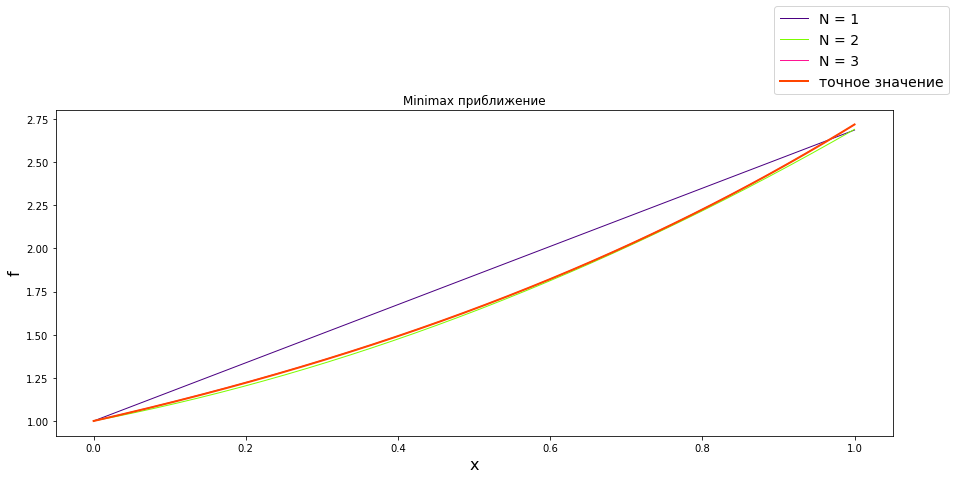

In [138]:
grid = np.linspace(0, 1, 1000)
plt.figure(figsize=(15, 6))
plt.plot(grid, res_poly_1(grid), color = 'indigo', label = "N = 1", linewidth = 1)
plt.plot(grid, res_poly_2(grid), color = 'lawngreen', label = "N = 2", linewidth = 1)
plt.plot(grid, res_poly_3(grid), color = 'deeppink', label = "N = 3", linewidth = 1)
plt.plot(grid, expon(grid), color = 'orangered', label = "точное значение", linewidth = 2)
plt.xlabel('x', fontsize=16)
plt.ylabel('f', fontsize=16)
plt.legend(fontsize = 14, bbox_to_anchor=(0.85,1.025))
plt.title("Minimax приближение")
plt.show()

Как мы видим, при увеличении степени полинома, улучшается и качество приближения.

Рассмотрим графики погрешности:

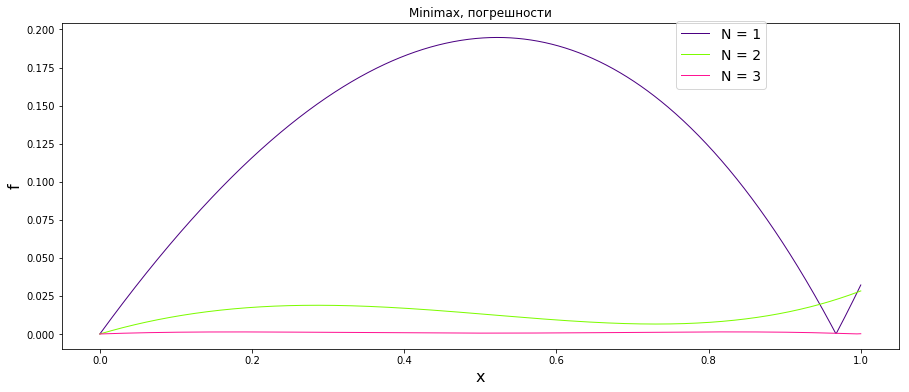

In [139]:
grid = np.linspace(0, 1, 1000)
plt.figure(figsize=(15, 6))
plt.plot(grid, abs(expon(grid) - res_poly_1(grid)), color = 'indigo', label = "N = 1", linewidth = 1)
plt.plot(grid, abs(expon(grid)-res_poly_2(grid)), color = 'lawngreen', label = "N = 2", linewidth = 1)
plt.plot(grid, abs(expon(grid) - res_poly_3(grid)), color = 'deeppink', label = "N = 3", linewidth = 1)
plt.xlabel('x', fontsize=16)
plt.ylabel('f', fontsize=16)
plt.legend(fontsize = 14, bbox_to_anchor=(0.85,1.025))
plt.title("Minimax, погрешности")
plt.show()

Действительно, погрешности с увеличением степени полинома уменьшаются.

In [141]:
print('Максимальная погрешность при N = 1:     ', np.max(abs(expon(grid) - res_poly_1(grid))))
print('Максимальная погрешность при N = 2:     ', np.max(abs(expon(grid) - res_poly_2(grid))))
print('Максимальная погрешность при N = 3:     ', np.max(abs(expon(grid) - res_poly_3(grid))))

Максимальная погрешность при N = 1:      0.1947530002683142
Максимальная погрешность при N = 2:      0.028274583196073344
Максимальная погрешность при N = 3:      0.0013612059888297168


Итак, максимальная погрешность по сетке (она же погрешность в С-норме) также уменьшается с ростом степени полинома.